In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('D:\Desktop\Assignment 3\s.csv')

In [59]:
data

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
395,616325,730469
396,554610,782542
397,727303,809509
398,603709,757145


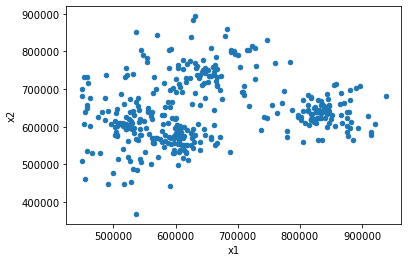

In [60]:
data.plot.scatter('x1', 'x2');

In [61]:
X = data['x1']
Y = data['x2']

In [62]:
import math
loss = []
cur_loss = []
for i, j in zip(X,Y):
    for n, m in zip(X,Y):
        cur_loss.append(math.sqrt((((n - i )**2) + ((m-j)**2) )))
    loss.append(cur_loss)
    cur_loss = []

In [63]:
proximity_matrix = pd.DataFrame(np.array(loss))

In [64]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [65]:
import sys
np.fill_diagonal(proximity_matrix.to_numpy(),np.nan)
df = proximity_matrix.copy()

In [66]:
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,NaN,7218.653406,71357.484961,45561.743612,63803.557589,76348.461969,82281.509229,64003.230559,97738.680107,63953.577765,...,217736.139067,188969.202538,171195.877079,344205.650866,211213.832009,185786.434071,256198.537500,266161.585705,214877.244261,252361.776583
1,7218.653406,NaN,70884.793242,47692.634505,58458.793915,77745.914066,84652.796622,63382.650883,101851.475002,63329.389228,...,211754.859356,182241.080805,164179.944025,337385.756891,204004.094697,179471.057321,250615.350994,258942.985423,208646.962345,245192.468581
2,71357.484961,70884.793242,NaN,32241.910505,50401.680061,20112.728035,33030.461290,7566.276892,62505.370657,7623.050898,...,180164.092061,168374.802794,161410.287048,319927.392819,211549.805096,156110.261882,211334.486029,267724.197153,181724.576613,246003.771882
3,45561.743612,47692.634505,32241.910505,NaN,59123.836986,31112.283169,36960.482275,26997.504422,57154.647493,26979.136272,...,206139.432484,188146.087956,176812.438686,342408.756099,223730.762536,179037.454612,239791.745721,280022.952949,206237.291686,261293.551939
4,63803.557589,58458.793915,50401.680061,59123.836986,NaN,69360.059573,81896.560673,45628.040775,110021.517032,45577.683508,...,154510.938852,130394.145777,117727.037311,285591.331264,164972.847660,123945.125576,192413.150320,221314.893620,152490.314978,202169.789348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,185786.434071,179471.057321,156110.261882,179037.454612,123945.125576,175169.891209,187444.811569,156326.479756,216730.948302,156308.133595,...,36593.420570,24983.574704,49093.517984,163852.272810,91472.981000,NaN,80748.613326,136247.708546,29508.853451,105594.967802
396,256198.537500,250615.350994,211334.486029,239791.745721,192413.150320,227433.247824,237934.506169,213907.096304,264802.541532,213907.303592,...,44253.115608,96163.434657,125577.188255,135139.389243,150725.712634,80748.613326,NaN,174785.844215,55278.561939,141143.280155
397,266161.585705,258942.985423,267724.197153,280022.952949,221314.893620,287822.281017,300740.705705,265009.311627,330007.765806,264969.604068,...,147829.197904,112597.255992,107477.563426,127405.966254,56346.825368,136247.708546,174785.844215,NaN,134229.152318,33793.654981
398,214877.244261,208646.962345,181724.576613,206237.291686,152490.314978,200166.523500,212066.545575,182570.571520,240923.943650,182556.894419,...,14124.799361,40884.873156,70328.059976,139283.491172,99702.964876,29508.853451,55278.561939,134229.152318,NaN,101016.939416


In [67]:
maxi = 0
length = 400
spare = pd.DataFrame([i for i in range(400)])
used = []
while len(df.columns) > 4:
    search = df.min().min()
    indices = getIndexes(df, search)
    label1 = indices[0][0]
    label2 = indices[0][1]
    used.append(label1)
    used.append(label2)
    if type(label1) == int and type(label2) == int:
        #df[(label1, label2)] = list(zip(proximity_matrix[label1], proximity_matrix[label2]))
        df[(label1,label2)] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[(label1,label2)].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == int and type(label2) == tuple:
        #df[(label1)] = list(zip(df[label1]))
        #df[tuple(list(label2) + [label1])] = df[label2] + df[(label1)]
        df[tuple(list(label2) + [label1])] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label2) + [label1])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == int:
        #df[(label2)] = list(zip(df[label2]))
        #df[tuple(list(label1) + [label2])] = df[label1] + df[(label2)]
        df[tuple(list(label1) + [label2])] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label1) + [label2])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == tuple:
        #df[label1 + label2] = df[label1] + df[label2]
        df[label1 + label2] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[label1 + label2].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)

# now this is way better than minimum method, and it is better in data visualization because here we have four clusters while when we used minimum method, it ended up with one big cluster and 3 points in the figure so it seems that maximum method is better at that point

In [68]:
df

,"(232, 45, 209, 290, 237, 233, 62, 299, 213, 212, 242, 236, 201, 253, 224, 207, 248, 289, 245, 225, 243, 230, 234, 206, 263, 261, 268, 238, 283, 265, 292, 271, 269, 298, 267, 251, 259, 228, 284, 279, 255, 285, 222, 297, 229, 244, 227, 266, 219, 288, 282, 239, 216, 240, 258, 200, 320, 202, 351, 382, 369, 272, 218, 316, 47, 58, 44, 287, 51, 231, 211, 249, 88, 318, 208, 286, 221, 275, 210, 278, 217, 247, 307, 273, 303, 291)","(188, 117, 138, 111, 141, 123, 172, 155, 178, 133, 187, 124, 153, 131, 199, 159, 198, 120, 108, 107, 181, 105, 197, 127, 183, 182, 184, 166, 106, 161, 152, 164, 147, 150, 140, 193, 169, 134, 126, 167, 118, 136, 189, 115, 148, 114, 162, 173, 100, 112, 194, 129, 104, 168, 180, 149, 190, 144, 160, 157, 156, 175, 101, 109, 122, 121, 185, 165, 196, 137, 125, 145, 130, 119, 102, 163, 103, 143, 132, 158, 176, 142, 179, 174, 186, 170, 135, 113, 154, 139, 116, 195, 171, 110, 192, 346, 321, 151, 387, 146, ...)","(254, 205, 270, 33, 8, 223, 214, 204, 52, 235, 75, 277, 257, 281, 260, 293, 215, 241, 262, 220, 256, 252, 70, 35, 39, 40, 3, 49, 38, 24, 68, 13, 87, 94, 80, 71, 69, 63, 32, 22, 43, 86, 65, 72, 30, 67, 1, 0, 15, 61, 56, 97, 60, 76, 28, 98, 95, 90, 53, 9, 7, 82, 48, 66, 14, 11, 21, 42, 27, 92, 16, 64, 17, 2, 36, 31, 20, 96, 55, 84, 74, 25, 81, 41, 18, 46, 12, 34, 246, 226, 73, 54, 77, 91, 78, 89, 37, 352, 19, 57, ...)","(59, 4, 23, 312, 313, 302, 344, 83, 338, 177, 322, 363, 374, 367, 366, 311, 392, 384, 310, 336, 339, 325, 361, 360, 373, 380, 301, 334, 306, 378, 348, 323, 342, 326, 305, 345, 353, 304, 343, 331, 370, 341, 391, 362, 398, 357, 376, 390, 324, 315, 388, 314, 383, 354, 372, 395, 347, 359, 381, 333, 364, 317, 377, 250, 358, 350, 394, 337, 355, 368, 335, 379, 329, 327, 308, 399, 397, 371, 386, 328, 330, 340, 300, 365, 332, 393, 375, 396, 294, 356, 319, 349, 309, 389, 385)"
"(232, 45, 209, 290, 237, 233, 62, 299, 213, 212, 242, 236, 201, 253, 224, 207, 248, 289, 245, 225, 243, 230, 234, 206, 263, 261, 268, 238, 283, 265, 292, 271, 269, 298, 267, 251, 259, 228, 284, 279, 255, 285, 222, 297, 229, 244, 227, 266, 219, 288, 282, 239, 216, 240, 258, 200, 320, 202, 351, 382, 369, 272, 218, 316, 47, 58, 44, 287, 51, 231, 211, 249, 88, 318, 208, 286, 221, 275, 210, 278, 217, 247, 307, 273, 303, 291)",NaN,490811.728340,388954.153366,369862.808201
"(188, 117, 138, 111, 141, 123, 172, 155, 178, 133, 187, 124, 153, 131, 199, 159, 198, 120, 108, 107, 181, 105, 197, 127, 183, 182, 184, 166, 106, 161, 152, 164, 147, 150, 140, 193, 169, 134, 126, 167, 118, 136, 189, 115, 148, 114, 162, 173, 100, 112, 194, 129, 104, 168, 180, 149, 190, 144, 160, 157, 156, 175, 101, 109, 122, 121, 185, 165, 196, 137, 125, 145, 130, 119, 102, 163, 103, 143, 132, 158, 176, 142, 179, 174, 186, 170, 135, 113, 154, 139, 116, 195, 171, 110, 192, 346, 321, 151, 387, 146, ...)",490811.728340,NaN,531307.018648,466561.524116
"(254, 205, 270, 33, 8, 223, 214, 204, 52, 235, 75, 277, 257, 281, 260, 293, 215, 241, 262, 220, 256, 252, 70, 35, 39, 40, 3, 49, 38, 24, 68, 13, 87, 94, 80, 71, 69, 63, 32, 22, 43, 86, 65, 72, 30, 67, 1, 0, 15, 61, 56, 97, 60, 76, 28, 98, 95, 90, 53, 9, 7, 82, 48, 66, 14, 11, 21, 42, 27, 92, 16, 64, 17, 2, 36, 31, 20, 96, 55, 84, 74, 25, 81, 41, 18, 46, 12, 34, 246, 226, 73, 54, 77, 91, 78, 89, 37, 352, 19, 57, ...)",388954.153366,531307.018648,NaN,533819.882044
"(59, 4, 23, 312, 313, 302, 344, 83, 338, 177, 322, 363, 374, 367, 366, 311, 392, 384, 310, 336, 339, 325, 361, 360, 373, 380, 301, 334, 306, 378, 348, 323, 342, 326, 305, 345, 353, 304, 343, 331, 370, 341, 391, 362, 398, 357, 376, 390, 324, 315, 388, 314, 383, 354, 372, 395, 347, 359, 381, 333, 364, 317, 377, 250, 358, 350, 394, 337, 355, 368, 335, 379, 329, 327, 308, 399, 397, 371, 386, 328, 330, 340, 300, 365, 332, 393, 375, 396, 294, 356, 319, 349, 309, 389, 385)",369862.808201,466561.524116,533819.882044,NaN


In [80]:
data['id'] = pd.DataFrame([i for i in range(400)])

In [81]:
l = df.columns.to_list()

In [82]:
data['label1'] = data.id.map(lambda x: 'r' if x in l[0] else '')

In [83]:
data['label2'] = data.id.map(lambda x: 'b' if x in l[1] else '')

In [84]:
data['label3'] = data.id.map(lambda x: 'y' if x in l[2] else '')

In [85]:
data['label4'] = data.id.map(lambda x: 'm' if x in l[3] else '')

In [86]:
data

,x1,x2,id,label1,label2,label3,label4,label
0,664159,550946,0,,,y,,d
1,665845,557965,1,,,y,,d
2,597173,575538,2,,,y,,d
3,618600,551446,3,,,y,,d
4,635690,608046,4,,,,m,m
...,...,...,...,...,...,...,...,...
395,616325,730469,395,,,,m,m
396,554610,782542,396,,,,m,m
397,727303,809509,397,,,,m,m
398,603709,757145,398,,,,m,m


In [87]:
data['label'] = data['label1'] + data['label2'] + data['label3'] + data['label4']
data

,x1,x2,id,label1,label2,label3,label4,label
0,664159,550946,0,,,y,,y
1,665845,557965,1,,,y,,y
2,597173,575538,2,,,y,,y
3,618600,551446,3,,,y,,y
4,635690,608046,4,,,,m,m
...,...,...,...,...,...,...,...,...
395,616325,730469,395,,,,m,m
396,554610,782542,396,,,,m,m
397,727303,809509,397,,,,m,m
398,603709,757145,398,,,,m,m


# it seems that this method is doing a great job I can see four neat clusters but we still need to get only two clusters out of this method to compare the result with the minimum method's result 

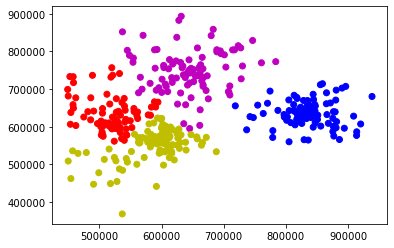

In [88]:
plt.scatter(data['x1'], data['x2'], c = data['label'].to_list())

In [92]:
data = pd.read_csv('D:\Desktop\Assignment 3\s.csv')

In [93]:
import sys
np.fill_diagonal(proximity_matrix.to_numpy(),np.nan)
df = proximity_matrix.copy()

In [94]:
maxi = 0
length = 400
spare = pd.DataFrame([i for i in range(400)])
used = []
while len(df.columns) > 2:
    search = df.min().min()
    indices = getIndexes(df, search)
    label1 = indices[0][0]
    label2 = indices[0][1]
    used.append(label1)
    used.append(label2)
    if type(label1) == int and type(label2) == int:
        #df[(label1, label2)] = list(zip(proximity_matrix[label1], proximity_matrix[label2]))
        df[(label1,label2)] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[(label1,label2)].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == int and type(label2) == tuple:
        #df[(label1)] = list(zip(df[label1]))
        #df[tuple(list(label2) + [label1])] = df[label2] + df[(label1)]
        df[tuple(list(label2) + [label1])] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label2) + [label1])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == int:
        #df[(label2)] = list(zip(df[label2]))
        #df[tuple(list(label1) + [label2])] = df[label1] + df[(label2)]
        df[tuple(list(label1) + [label2])] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label1) + [label2])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == tuple:
        #df[label1 + label2] = df[label1] + df[label2]
        df[label1 + label2] = [max(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[label1 + label2].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)

In [96]:
data['id'] = pd.DataFrame([i for i in range(400)])

In [97]:
l = df.columns.to_list()

In [98]:
data['label1'] = data.id.map(lambda x: 'r' if x in l[0] else '')

In [99]:
data['label2'] = data.id.map(lambda x: 'b' if x in l[1] else '')

In [101]:
data['label'] = data['label1'] + data['label2']

# there are two clusters here but it is not good the minimum method is way better

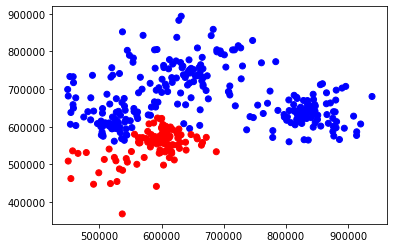

In [102]:
plt.scatter(data['x1'], data['x2'], c = data['label'].to_list())

# so it seems that minimum method is better when we deal with big clusters and when I narrowed the data down to 2 clusters only however when I want to plot more clusters it is definitely better to use the maximum method, it has shown me 4 clusters while the minimum method has ended up with only two clusters and this doesn't help in data visualization.